[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/master/example_notebooks/autoregression_yosemite_temps.ipynb)

# NBeats

This is a NBeats model module usage example. We implemented this model under the same API as NeuralProphet, for easy comparison of the results of NeuralProphet and SOTA models

We used as the base the implementation of NBeats from Pytorch Forecasting library. The model parameters are inherited automatically from the dataset structure, if from_dataset is set to True
For more detail on hyperparameters, please follow https://github.com/jdb78/pytorch-forecasting/blob/master/pytorch_forecasting/models/nbeats/__init__.py

In [6]:
from neuralprophet.forecaster_additional_models import NBeatsNP
import pandas as pd

In [11]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    data_location = "https://raw.githubusercontent.com/ourownstory/neural_prophet/master/"
else:
    data_location = "../"

df = pd.read_csv(data_location + "example_data/yosemite_temps.csv")
df.head(3)
freq = '5min'

df = df.iloc[:1000]

In [12]:
m = NBeatsNP(
        max_encoder_length = 150,
        batch_size = None,
        epochs = 10,
        num_gpus = 0,
        patience_early_stopping = 10,
        early_stop = True,
        weight_decay=1e-2,
        learning_rate=3e-2,
        auto_lr_find=False,
        num_workers=3,
    )

In [14]:
m.fit(df, freq = freq)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name            | Type       | Params
-----------------------------------------------
0 | loss            | MASE       | 0     
1 | logging_metrics | ModuleList | 0     
2 | net_blocks      | ModuleList | 2.1 M 
-----------------------------------------------
2.1 M     Trainable params
0         Non-trainable params
2.1 M     Total params
8.545     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/torch/nn/modules/loss.py:907: UserWarning: Using a target size (torch.Size([1, 200])) that is different to the input size (torch.Size([200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/torch/nn/modules/loss.py:907: UserWarning: Using a target size (torch.Size([32, 200])) that is different to the input size (torch.Size([200])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

,SmoothL1Loss,MAE,MSE,SmoothL1Loss_val,MAE_val,MSE_val
0,14.229805,14.722071,362.733489,18.906218,19.406139,537.220642
1,12.757059,13.247428,289.994050,8.601149,9.092503,124.164261
2,12.596908,13.086294,283.083241,3.641934,4.121273,24.546816
3,11.622920,12.110525,249.372526,0.766586,1.176477,2.253837
4,12.141182,12.626459,275.494036,1.842237,2.301214,8.020111
5,11.719431,12.206883,252.464951,2.628962,3.086637,15.905052
6,11.525635,12.009123,253.746773,1.296579,1.759589,4.280819
7,12.404764,12.891778,276.740772,3.466417,3.952707,21.519508
8,12.168716,12.655272,272.392677,1.560530,2.022994,5.436709
9,12.689543,13.174820,289.457139,0.672990,1.099927,1.681402


In [15]:
future = m.make_future_dataframe(df, freq, periods=10, n_historic_predictions=10)

In [16]:
forecast = m.predict(future)

In [20]:
forecast.iloc[-15:]

,ds,y,yhat1,residual1
155,2017-05-04 10:55:00,8.3,7.581034,-0.718966
156,2017-05-04 11:00:00,8.2,7.574735,-0.625265
157,2017-05-04 11:05:00,8.2,7.505713,-0.694287
158,2017-05-04 11:10:00,8.2,7.262897,-0.937103
159,2017-05-04 11:15:00,8.1,6.809942,-1.290058
160,2017-05-04 11:20:00,NaN,6.229907,NaN
161,2017-05-04 11:25:00,NaN,5.714649,NaN
162,2017-05-04 11:30:00,NaN,5.489238,NaN
163,2017-05-04 11:35:00,NaN,5.700409,NaN
164,2017-05-04 11:40:00,NaN,6.32621,NaN


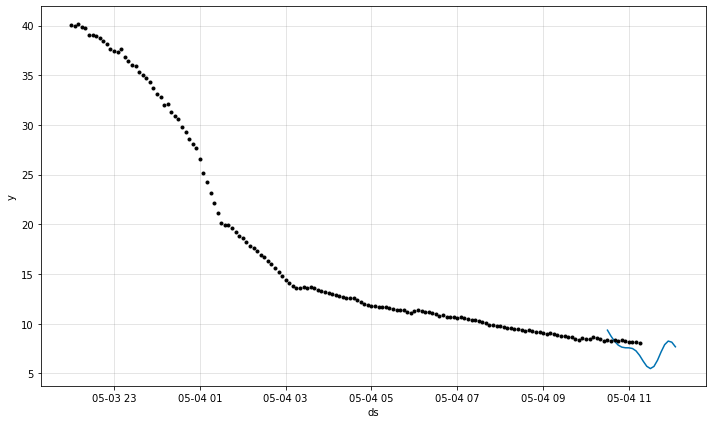

In [17]:
f = m.plot(forecast)